In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('10122023_USA Staffing_Cleaned (2022q2)_opm_included.csv')
df2 = pd.read_csv('20220908_USA Staffing_Cleaned (2022q2)-2.csv')

/var/folders/my/k8vfhbn90612lmd_2_zn09jc0000gp/T/ipykernel_45040/1989923222.py:3: DtypeWarning: Columns (5,23,24,26,27,28,29,30,33,35,36,37,71,72,73,74,77) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('10122023_USA Staffing_Cleaned (2022q2)_opm_included.csv')
/var/folders/my/k8vfhbn90612lmd_2_zn09jc0000gp/T/ipykernel_45040/1989923222.py:4: DtypeWarning: Columns (23,24,26,27,28,29,30,33,35,36,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('20220908_USA Staffing_Cleaned (2022q2)-2.csv')


In [2]:
df

,agency,bureau,pay_plan,job_series_number,job_series_title,grade,usajobs_control_number,vacancy_job_title,vacancy_announcement_types,announcement_type,...,opm_total_elig,opm_total_complete,opm_total_selectees,opm_pay_grade,opm_race_omitted,opm_white,opm_non_white,opm_female,opm_male,opm_gender_omitted
0,Department of the Treasury,Office of the Comptroller of the Currency,NB,'0000,Multiple/unrecognized,1,1702173,Deu Template,NaN,DELEGATED EXAMINING UNIT/DELEGATED EXAMINING U...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Department of the Treasury,Office of the Comptroller of the Currency,NB,'0000,Multiple/unrecognized,1,1702173,Deu Template,NaN,DELEGATED EXAMINING UNIT/DELEGATED EXAMINING U...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Department of the Treasury,Office of the Comptroller of the Currency,NB,'0002,Multiple/unrecognized,1,1894958,"Master Template, Nb-0000-5.2*",NaN,MERIT PROMOTION - NON EXAMINER JOBS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Department of the Treasury,Office of the Comptroller of the Currency,NB,'0000,Multiple/unrecognized,1,2106561,Deu Template,NaN,DELEGATED EXAMINING UNIT- BU,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Department of the Treasury,Office of the Comptroller of the Currency,NB,'0002,Multiple/unrecognized,1,2106720,Master Template,NaN,MERIT PROMOTION - NON EXAMINER JOBS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2120630,NaN,Office of Personnel Management,NaN,NaN,NaN,NaN,745933100,Personnel Research Psychologist,NaN,NaN,...,0,1.0,0.0,14,NaN,NaN,NaN,NaN,NaN,NaN
2120631,NaN,Office of Personnel Management,NaN,NaN,NaN,NaN,746107700,Accountant,NaN,NaN,...,0,1.0,0.0,15,NaN,NaN,NaN,NaN,NaN,NaN
2120632,NaN,Office of Personnel Management,NaN,NaN,NaN,NaN,746107800,Accountant,NaN,NaN,...,0,1.0,0.0,15,NaN,NaN,NaN,NaN,NaN,NaN
2120633,NaN,Office of Personnel Management,NaN,NaN,NaN,NaN,746135700,HR Specialist (Information Systems),NaN,NaN,...,0,0.0,0.0,13,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
df['quarter_open'] = df['quarter_open'].str[2:]
# Group by year and count stem and non-stem
result = df.groupby('quarter_open')['stem'].value_counts().unstack(fill_value=0)
result2 = result.iloc[6:]
# Rename columns for clarity
result2.columns = ['non-stem', 'stem']

In [3]:
result2

,non-stem,stem
quarter_open,,
19q2,83562,14043
19q3,84994,13408
19q4,97175,28420
20q1,93057,16710
20q2,88077,19486
20q3,76186,16519
20q4,77722,14589
21q1,94365,20609
21q2,95793,23187


In [4]:
# create dataframe health that groups the number of health and non-health jobs by quarter/year
health = df.groupby('quarter_open')['health'].value_counts().unstack(fill_value = 0)
# rename columns
health.columns = ['non-health', 'health']
# drop first 6 rows to start the graph at 2019q2
health2 = health.iloc[6:]

In [5]:
health2

,non-health,health
quarter_open,,
19q2,88304,9301
19q3,88821,9581
19q4,117133,8462
20q1,98838,10929
20q2,97070,10493
20q3,82302,10403
20q4,81882,10429
21q1,101573,13401
21q2,107441,11539


In [6]:
health_stem = health2.merge(result2, on = 'quarter_open', how = 'outer')
health_stem

,non-health,health,non-stem,stem
quarter_open,,,,
19q2,88304,9301,83562,14043
19q3,88821,9581,84994,13408
19q4,117133,8462,97175,28420
20q1,98838,10929,93057,16710
20q2,97070,10493,88077,19486
20q3,82302,10403,76186,16519
20q4,81882,10429,77722,14589
21q1,101573,13401,94365,20609
21q2,107441,11539,95793,23187


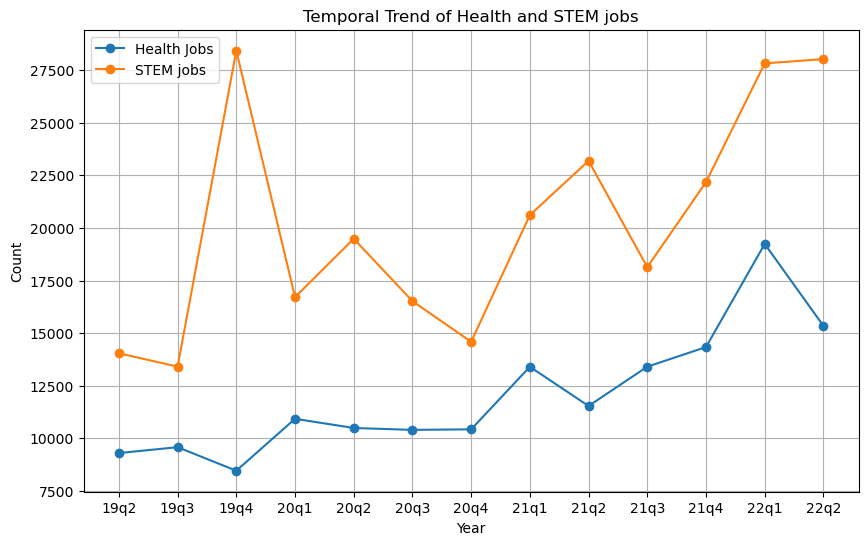

In [7]:
plt.figure(figsize=(10, 6)) 
plt.plot(health_stem.index, health_stem['health'], label='Health Jobs', marker='o')
plt.plot(health_stem.index, health_stem['stem'], label='STEM jobs', marker='o')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Temporal Trend of Health and STEM jobs')
plt.legend()
plt.grid(True)
plt.xticks(rotation = 0)
#plt.savefig('/Users/darren/Downloads/Temporal Trend of Health and STEM Jobs',bbox_inches='tight')
plt.show()